## Libraries

In [ ]:
! pip install numpy
! pip install pandas
! pip install scikit-learn
! pip install matplotlib
! pip install seaborn

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

## 1.3.1
Задайте 4 точки в трехмерном пространстве, рассчитайте между ними 
расстояния по описанным в примере выше метрикам. Отобразите точки 
в трехмерном пространстве.

,p1,p2,evk,che,hem
0,0.0,1.0,0.361158,0.293026,0.576625
1,0.0,2.0,0.803677,0.654837,1.246140
2,0.0,3.0,0.838920,0.585698,1.421878
3,1.0,2.0,0.730521,0.466366,1.255568
4,1.0,3.0,0.564293,0.397612,0.845253
5,2.0,3.0,0.501212,0.493720,0.614575


,name,x,y,z
0,A,1.000000,1.000000,1.0
1,B,9.000000,9.000000,1.0
2,C,23.928203,-4.237604,1.0
3,D,5.000000,5.000000,1.0


,name,evk,che,hem
0,AB,11.313708,8.000000,16.000000
1,BC,19.952078,14.928203,28.165808
2,CA,23.518822,22.928203,28.165808


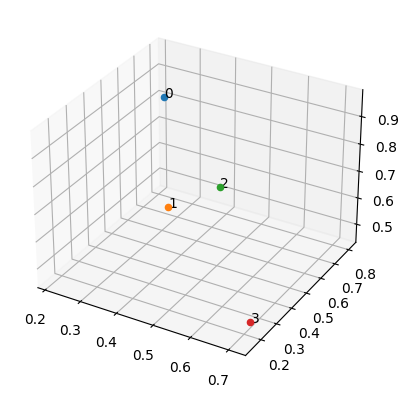

In [52]:
POINTS_LEN = 4
_points = np.random.rand(POINTS_LEN, 3)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for _index in range(POINTS_LEN):
    ax.scatter(*_points[_index])
    ax.text(*_points[_index], _index)

# plt.show()

df = pd.DataFrame(columns=["p1","p2","evk","che","hem"])
for _index in range(POINTS_LEN):
    for _index2 in range(_index+1, POINTS_LEN):
        df.loc[len(df)]=[_index,_index2,
                         np.linalg.norm(_points[_index] - _points[_index2]),
                         np.linalg.norm(_points[_index] - _points[_index2], ord=np.inf),
                         np.linalg.norm(_points[_index] - _points[_index2], ord=1)
        ]
display(df)

A = np.array((1,1,1))
B = np.array((9,9,1))
D = np.array((
    (A[0]+B[0]) / 2,
    (A[1]+B[1]) / 2,
    (A[2]+B[2]) / 2
))

import math

dist = np.linalg.norm(A - B, ord=np.inf)
cosphi = (dist**2)/(2*dist**2)
sinphi = -math.sqrt(1 - cosphi**2)
C = np.array((
    A[0] + 1 / cosphi * (B[0]-A[0]) - sinphi * (B[0]-A[0]),
    A[1] + 1 / sinphi * (B[0]-A[0]) + cosphi * (B[0]-A[0]),
    1
))

df = pd.DataFrame(columns=["name","x","y","z"])
df.loc[len(df)]=['A', *A]
df.loc[len(df)]=['B', *B]
df.loc[len(df)]=['C', *C]
df.loc[len(df)]=['D', *D]
display(df)

df = pd.DataFrame(columns=["name","evk","che","hem"])
df.loc[len(df)] = ['AB', 
                   np.linalg.norm(A - B),
                   np.linalg.norm(A - B, ord=np.inf),
                   np.linalg.norm(A - B, ord=1)
]
df.loc[len(df)] = ['BC', 
                   np.linalg.norm(B - C),
                   np.linalg.norm(B - C, ord=np.inf),
                   np.linalg.norm(B - C, ord=1)

]
df.loc[len(df)] = ['CA', 
                   np.linalg.norm(C - A),
                   np.linalg.norm(C - A, ord=np.inf),
                   np.linalg.norm(C - A, ord=1)

]
display(df)

## 1.3.2
Создать 5x5 матрицу со значениями в строках от 0 до 4. Для создания 
необходимо использовать функцию arange.

In [ ]:
_matrix = np.array([np.arange(5) for _ in range(5)])

_matrix

## 2.3.1
Для  предыдущего  примера  поэкспериментируйте  с  параметрами 
классификатора: 
1.  Установите другое количество ближайших соседей (k = 1, 5, 10). 
2.  Установите размер тестовой выборки 15% от всего датасета. 
3.  Постройте графики и оцените качество моделей, проанализируйте 
результаты. 

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [21]:
K = 3

iris = sns.load_dataset('iris')

X_train, X_test, y_train, y_test = train_test_split(
    iris.iloc[:,:-1],
    iris.iloc[:,-1],
    test_size = 0.20
)

model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

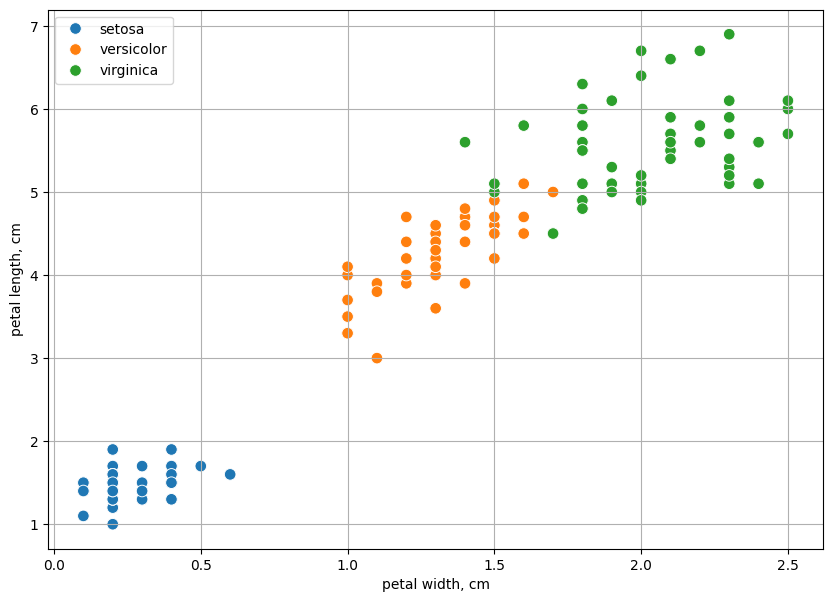

1.0


In [22]:
plt.figure(figsize=(10,7))
plt.xlabel('petal width, cm')
sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
plt.xlabel('petal width, cm')
plt.ylabel('petal length, cm')
plt.legend(loc=2)
plt.grid()

for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred[i]:
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)

plt.show()
print(f"{accuracy_score(y_test, y_pred):.3}")


## 3.3.2
Определите набор признаков человека, по аналогии из РТ 1, – например, 
цвет глаз и конвертируйте его в матрицу признаков. 

In [ ]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
data_dict = [{'persuasion': 2, "intimidation": 4},
             {'persuasion': 4, "intimidation": 3},
             {'persuasion': 1, "deception": 2},
             {'persuasion': 2, "deception": 2}]

DictVectorizer(sparse=False).fit_transform(data_dict)